In [1]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [7]:
# write your code here
import sqlite3

conn = sqlite3.connect("../db.sqlite3")
cursor = conn.cursor()

cursor.execute('''SELECT restaurant_orderitem.id, restaurant_orderitem.order_id, quantity, datetime, price, name
FROM restaurant_orderitem
INNER JOIN restaurant_order on restaurant_orderitem.order_id = restaurant_order.id
INNER JOIN restaurant_product on restaurant_orderitem.product_id = restaurant_product.id;''')

rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=[column[0] for column in cursor.description])

df.to_csv("restaurant.csv", index=False)
    
df.tail()

,id,order_id,quantity,datetime,price,name
74813,74814,3255,2,2016-05-18 18:53:00,17.95,House Red wine 75cl
74814,74815,12905,2,2016-05-14 19:28:00,17.95,House Red wine 75cl
74815,74816,3272,2,2016-05-10 13:18:00,17.95,House Red wine 75cl
74816,74817,11404,1,2016-04-07 19:04:00,17.95,House white wine 75cl
74817,74818,11449,1,2015-10-02 17:29:00,17.95,House Red wine 75cl


In [2]:
df = pd.read_csv("restaurant.csv")

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

([<matplotlib.patches.Wedge at 0x1da0ec3c3b0>,
 [Text(-0.03521018227987329, 3.2998121526935162, 'Aloo Chaat'),
  Text(-0.13946473404951917, 3.2970516507868814, 'Aloo Gobi'),
  Text(-0.2133447460849688, 3.2930964181629943, 'Aloo Methi'),
  Text(-0.24035731736608779, 3.291235081240564, 'Baingan Hari Mirch'),
  Text(-0.26746476724149354, 3.2891431404371043, 'Bengal Fish Biryani'),
  Text(-0.2744609464887873, 3.288566737782963, 'Bengal Fish Karahi'),
  Text(-0.27901335043114617, 3.2881836247814977, 'Bengal Fry Fish'),
  Text(-0.2936661940752088, 3.2869073863523113, 'Bengal King Prawn'),
  Text(-0.3138597301178928, 3.2850406496435207, 'Bengal Salad'),
  Text(-0.34933564056213046, 3.2814576959383537, 'Bhindi Bhajee'),
  Text(-0.43463492000103743, 3.271252433902907, 'Bhuna'),
  Text(-0.5156779484595122, 3.2594595032723737, 'Bhuna - Chicken'),
  Text(-0.5543809829132369, 3.2531003251950525, 'Bhuna - Chicken Tikka'),
  Text(-0.5719477099886606, 3.2500578174916717, 'Bhuna - King Prawn'),
  Text(

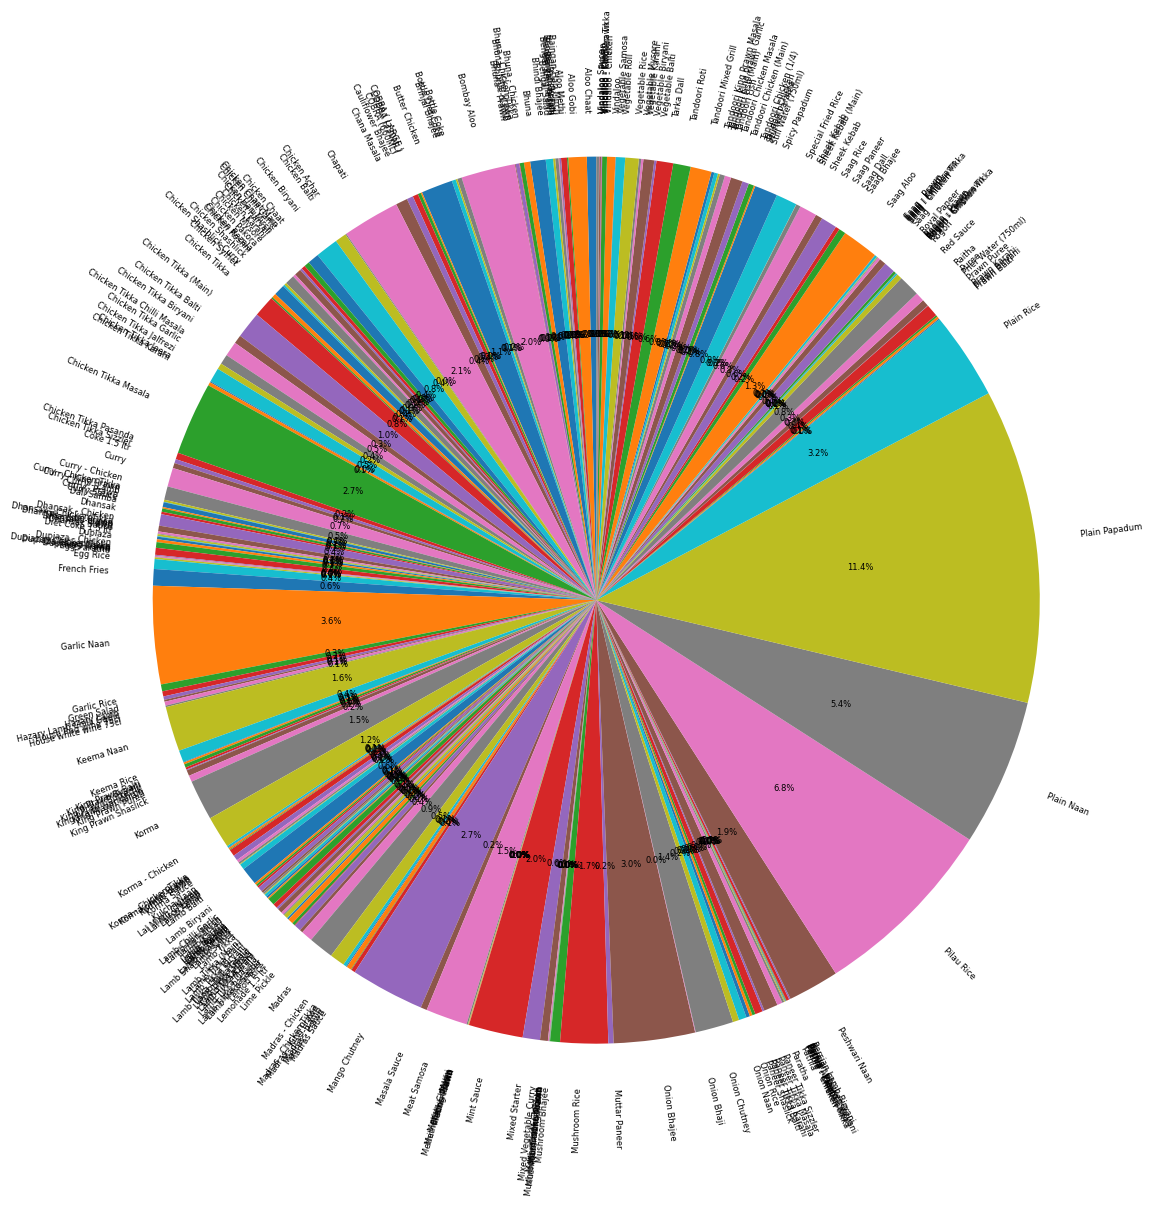

In [18]:
# write your code here

productPopularity = df.groupby("name")["quantity"].sum()


import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 6})
plt.pie(productPopularity, autopct='%1.1f%%', startangle=90, labels=productPopularity.index, radius=3, rotatelabels=90)

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

([<matplotlib.patches.Wedge at 0x1da113557f0>,
 [Text(-0.5733939143315799, 0.9387328794750449, 'Aloo Chaat'),
  Text(-1.0999573926175246, 0.009681654097155854, 'Aloo Gobi'),
  Text(-0.7839427880184995, -0.7716435090854987, 'Aloo Methi'),
  Text(-0.1845469370305442, -1.0844087919380976, 'Baingan Hari Mirch'),
  Text(0.4335238576172978, -1.0109683797610176, 'Bengal Fish Biryani'),
  Text(0.8909111481782221, -0.6451955719406034, 'Bengal Fish Karahi'),
  Text(1.0950914539233298, -0.10380128874001407, 'Bengal Fry Fish'),
  Text(1.0082833265203799, 0.43973257038909125, 'Bengal King Prawn'),
  Text(0.6875130537820333, 0.8586767732268664, 'Bengal Salad'),
  Text(0.23642325240730935, 1.0742923464872818, 'Bhindi Bhajee')],
 [Text(-0.31276031690813444, 0.5120361160772972, '17.5%'),
  Text(-0.5999767596095588, 0.005280902234812283, '14.8%'),
  Text(-0.4276051571009997, -0.4208964595011811, '10.2%'),
  Text(-0.1006619656530241, -0.5914957046935078, '9.7%'),
  Text(0.23646755870034422, -0.5514372980

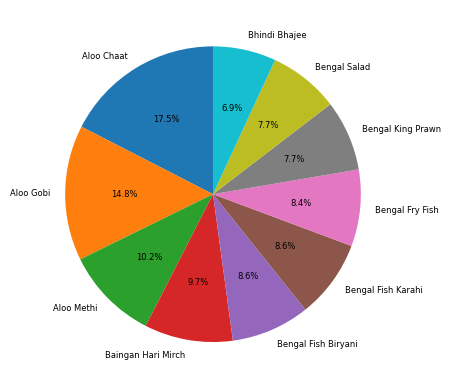

In [23]:
# write your code here
df["items price"] = df["quantity"] * df["price"]
plt.pie(df.groupby("name")["items price"].sum().sort_values(ascending=False)[:10], autopct='%1.1f%%', startangle=90, labels=productPopularity.index[:10])

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

<BarContainer object of 24 artists>

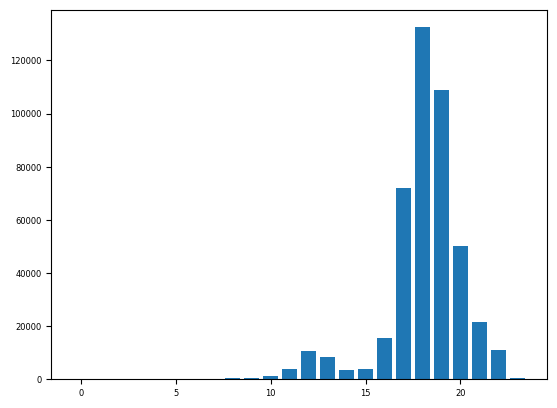

In [34]:
# write your code here
df["datetime"] = pd.to_datetime(df["datetime"])

df["hours"] = df["datetime"].dt.hour
allProfitInHours = df.groupby(df["hours"])["items price"].sum()
allProfitInHours = allProfitInHours._append(pd.Series({7: 0}))

plt.bar(allProfitInHours.index, allProfitInHours)

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

<BarContainer object of 7 artists>

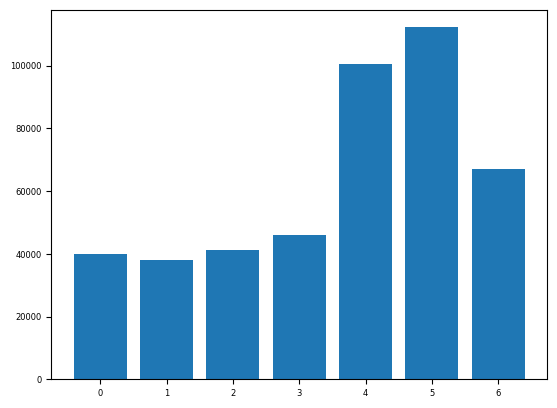

In [38]:
# write your code here

df["dayOfTheWeak"] = df["datetime"].dt.dayofweek
allProfitInWeekDay = df.groupby(df["dayOfTheWeak"])["items price"].sum()
plt.bar(allProfitInWeekDay.index, allProfitInWeekDay)